Adapted from [Image Processing Cookbook](https://github.com/PacktPublishing/Python-Image-Processing-Cookbook)

In [0]:
from skimage.color import rgb2gray
from skimage.io import imread
from skimage.util import random_noise
from scipy.ndimage import uniform_filter
from scipy.ndimage import median_filter
import numpy as np
import matplotlib.pylab as plt
from skimage.measure import compare_psnr
import cv2
from google.colab.patches import cv2_imshow

In [0]:
def plt_hist(noise, bins=None):
    plt.grid()
    plt.hist(np.ravel(noise), bins=bins, alpha=0.5, color='green')
    plt.tick_params(labelsize=15)
    plt.title('Noise Historgram', size=15)

In [0]:
def plt_images(im, im_noisy, noise, noise_type, i):
    im_denoised_mean = uniform_filter(im_noisy, 5)
    im_denoised_median = median_filter(im_noisy, 5)
    plt.subplot(7,4,i), plt.imshow(im_noisy,cmap='gray'), \
        plt.title('Noisy ({}), PSNR={}'.format(noise_type, \
        np.round(compare_psnr(im, im_noisy),3))), \
        plt.axis('off')
    plt.subplot(7,4,i+1), plt.imshow(im_denoised_mean,cmap='gray'), \
        plt.title('Denoised (mean), PSNR={}'.format(np.round\
        (compare_psnr(im, im_denoised_mean),3))), \
        plt.axis('off')
    plt.subplot(7,4,i+2), plt.imshow(im_denoised_median,cmap='gray'), \
        plt.title('Denoised (median), PSNR={}'.format(np.round\
        (compare_psnr(im, im_denoised_median),3))), \
        plt.axis('off')
    plt.subplot(7,4,i+3), plt_hist(noise)

In [0]:
!git clone https://github.com/PacktPublishing/Python-Image-Processing-Cookbook.git

Cloning into 'Python-Image-Processing-Cookbook'...
remote: Enumerating objects: 50, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 2642 (delta 24), reused 28 (delta 11), pack-reused 2592
Receiving objects: 100% (2642/2642), 1.25 GiB | 15.99 MiB/s, done.
Resolving deltas: 100% (493/493), done.
Checking out files: 100% (1078/1078), done.


In [0]:
IMAGE_DIR = '/content/Python-Image-Processing-Cookbook/Chapter 03/images/'

In [0]:
im = rgb2gray(imread(IMAGE_DIR + 'lena.png'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: DEPRECATED: skimage.measure.compare_psnr has been moved to skimage.metrics.peak_signal_noise_ratio. It will be removed from skimage.measure in version 0.18.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: DEPRECATED: skimage.measure.compare_psnr has been moved to skimage.metrics.peak_signal_noise_ratio. It will be removed from skimage.measure in version 0.18.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: DEPRECATED: skimage.measure.compare_psnr has been moved to skimage.metrics.peak_signal_noise_ratio. It will be removed from skimage.measure in version 0.18.
  


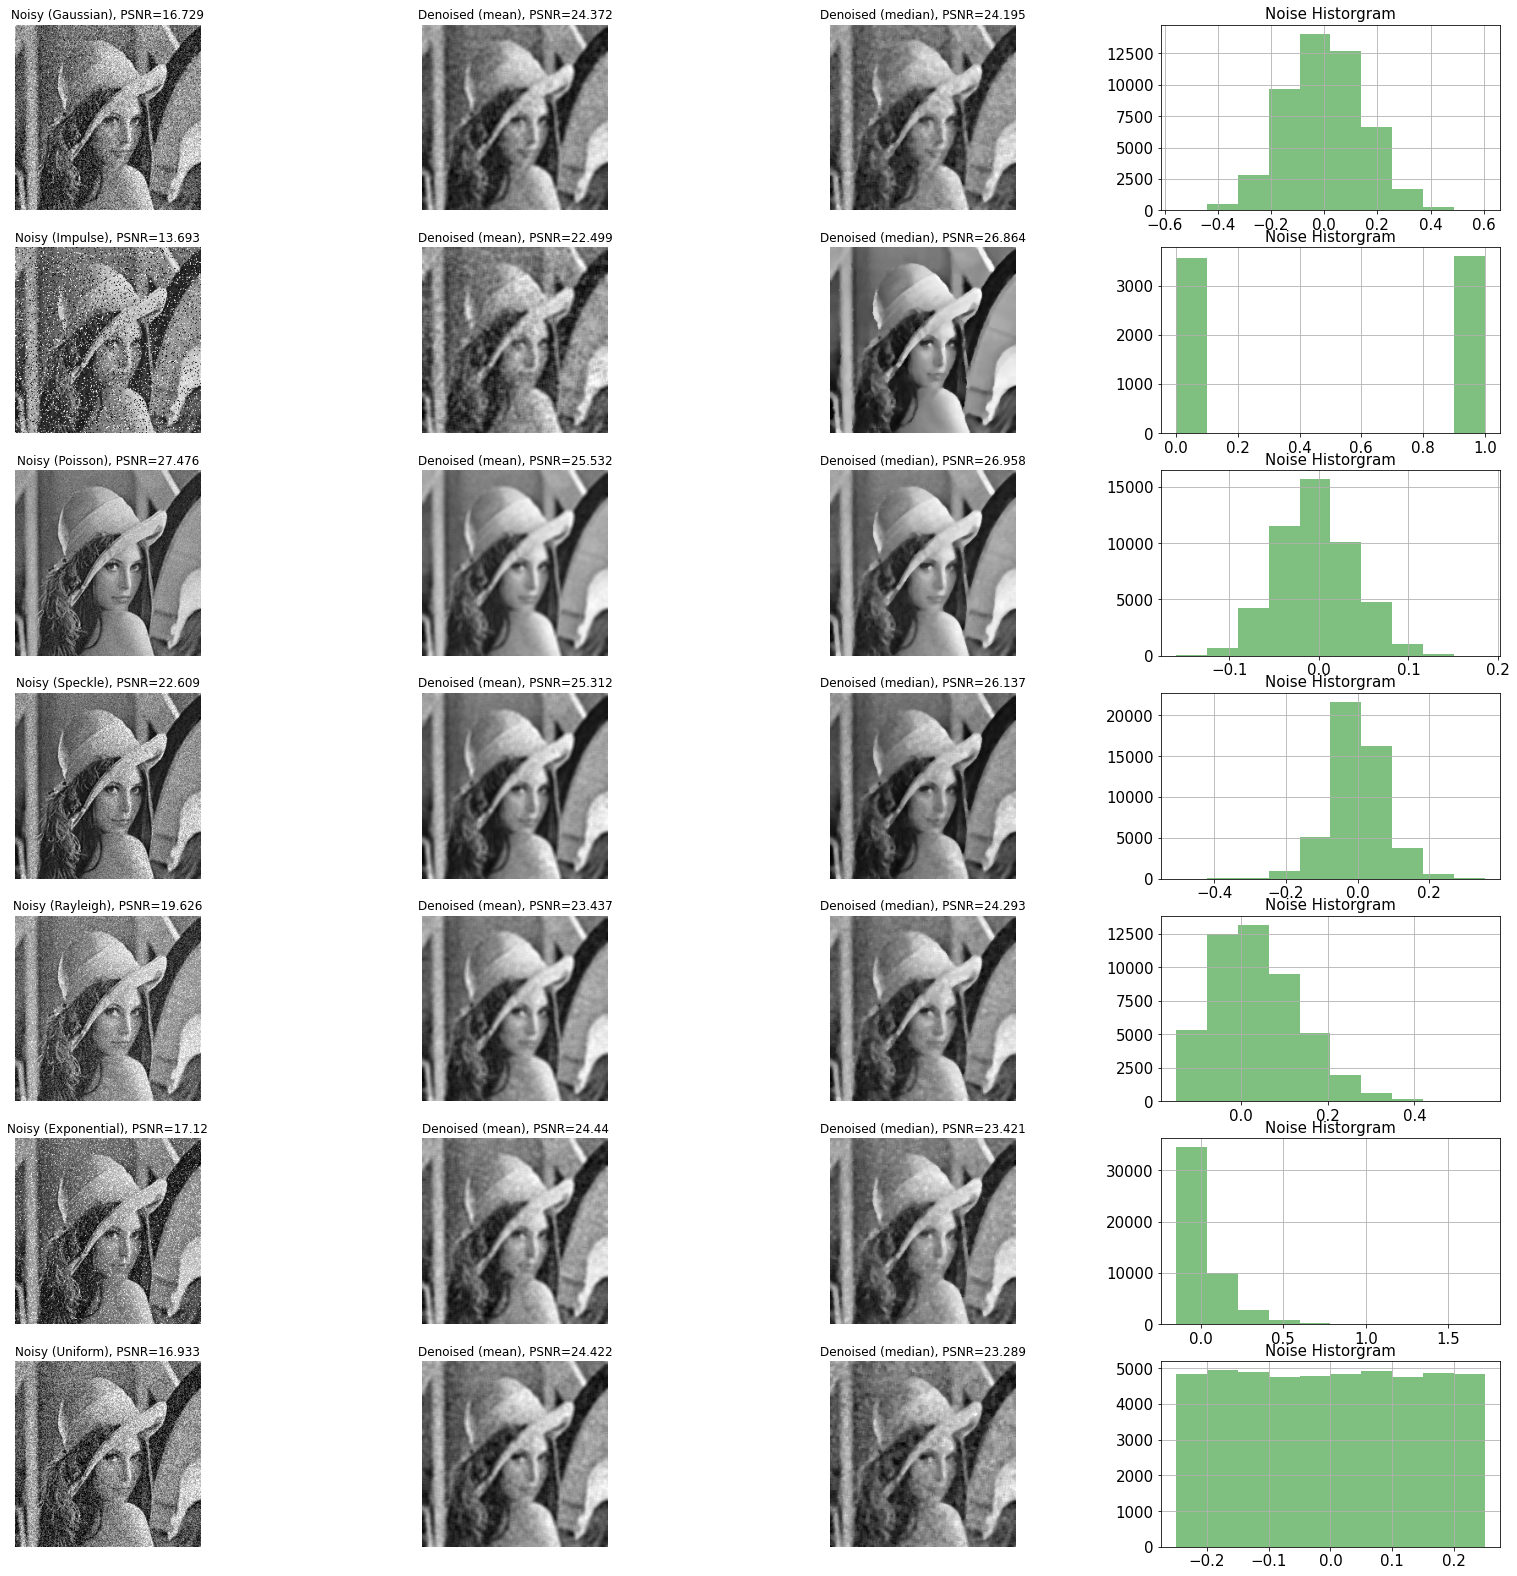

In [0]:
plt.figure(figsize=(28,28))
im1 = random_noise(im, 'gaussian', var=0.15**2)
plt_images(im, im1, im1-im, 'Gaussian', 1)

im1 = random_noise(im, 's&p', amount=0.15)
plt_images(im, im1, im1[((im1==0)|(im1==1))&((im!=0)&(im!=1))], 'Impulse', 5)

noise = np.random.poisson(lam=int(np.mean(255*im)), size=im.shape)/255 - np.mean(im)
im1 = np.clip(im + noise, 0, 1)
plt_images(im, im1, noise, 'Poisson', 9)

im1 = random_noise(im, 'speckle', var=0.15**2)
plt_images(im, im1, im1-im, 'Speckle', 13)

noise = np.random.rayleigh(scale=0.15, size=im.shape) - 0.15
im1 = np.clip(im + noise, 0, 1)
plt_images(im, im1, noise, 'Rayleigh', 17)

noise = np.random.exponential(scale=0.15, size=im.shape) - 0.15
im1 = np.clip(im + noise, 0, 1)
plt_images(im, im1, noise, 'Exponential', 21)

noise = np.random.uniform(0, 0.5, size=im.shape) - 0.25
im1 = np.clip(im + noise, 0, 1)
plt_images(im, im1, noise, 'Uniform', 25)